<a href="https://colab.research.google.com/github/rayanearaujoc/DMhealth/blob/main/resampling%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

In [ ]:
pip install plotly

Distribuição dos Scores de Ansiedade (escore_gad7):
escore_gad7
0     261
3      95
7      93
5      79
2      68
1      66
6      62
4      62
14     55
8      40
13     33
9      27
11     24
21     23
16     22
12     21
15     20
10     19
19     16
20     15
18     15
17     13
Name: count, dtype: int64
Proporção Ansiedade: 3.95 : 1

Distribuição dos Scores de Depressão (escore_phq9):
escore_phq9
0     291
4     101
3      79
5      79
2      68
6      64
7      52
8      50
1      49
9      46
14     40
13     30
11     29
18     28
16     22
10     20
12     20
15     14
17     11
21      9
24      7
20      7
19      4
27      3
26      2
22      2
25      1
23      1
Name: count, dtype: int64
Proporção Depressão: 5.94 : 1


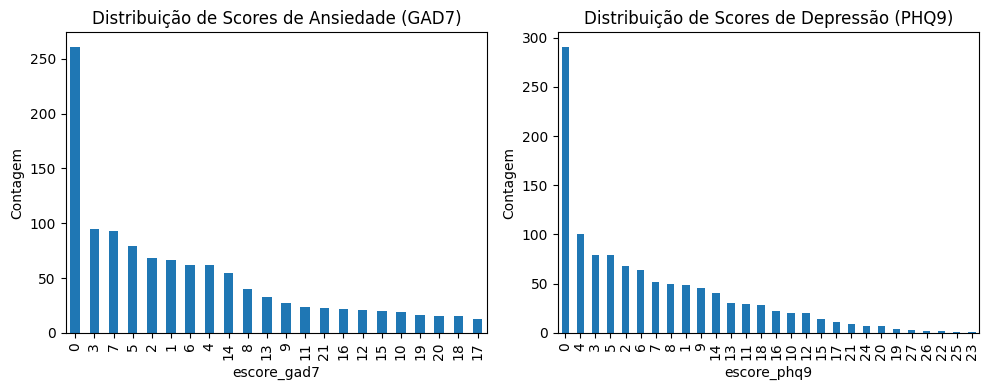

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_csv('/content/seguimento_tratado1.csv')

target_count_anxiety = df_train['escore_gad7'].value_counts()
print('Distribuição dos Scores de Ansiedade (escore_gad7):')
print(target_count_anxiety)
print('Proporção Ansiedade:', round(target_count_anxiety[0] / target_count_anxiety[1], 2), ': 1')

target_count_depression = df_train['escore_phq9'].value_counts()
print('\nDistribuição dos Scores de Depressão (escore_phq9):')
print(target_count_depression)
print('Proporção Depressão:', round(target_count_depression[0] / target_count_depression[1], 2), ': 1')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_count_anxiety.plot(kind='bar', title='Distribuição de Scores de Ansiedade (GAD7)')
plt.ylabel('Contagem')

plt.subplot(1, 2, 2)
target_count_depression.plot(kind='bar', title='Distribuição de Scores de Depressão (PHQ9)')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

df_train = pd.read_csv('/content/seguimento_tratado1.csv')

features = ['pqar_windows', 'pqar_quali', 'pqar_temp', 'pqar_tempagrado',
            'pqar_umid', 'pqar_arcond', 'pqar_mask', 'pqar_labcoat',
            'pqar_sint1', 'pqar_sint2', 'pqar_sint3', 'pqar_sint4',
            'pqar_sint5', 'phq1', 'phq2', 'phq3', 'phq4',
            'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'phq_10', 'gad1',
            'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'escore_burnout']

X = df_train[features]
y = df_train['escore_gad7']  # Target 1: Ansiedade


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

y = df_train['escore_phq9']  # Target 2: Depressão

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from collections import Counter

df_train = pd.read_csv('/content/seguimento_tratado1.csv')

features = ['pqar_windows', 'pqar_quali', 'pqar_temp', 'pqar_tempagrado',
            'pqar_umid', 'pqar_arcond', 'pqar_mask', 'pqar_labcoat',
            'pqar_sint1', 'pqar_sint2', 'pqar_sint3', 'pqar_sint4',
            'pqar_sint5', 'phq1', 'phq2', 'phq3', 'phq4',
            'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'phq_10', 'gad1',
            'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'escore_burnout']

X = df_train[features]
y = df_train['escore_gad7']
print("Distribuição original das classes:")
print(Counter(y))

df_combined = pd.concat([X, y], axis=1)

min_class_size = df_combined['escore_gad7'].value_counts().min()

df_majority = df_combined[df_combined['escore_gad7'] == 0]
df_majority_undersampled = df_majority.sample(n=min_class_size, random_state=1)


df_minority = df_combined[df_combined['escore_gad7'] != 0]
df_balanced = pd.concat([df_majority_undersampled, df_minority])


X_balanced = df_balanced[features]
y_balanced = df_balanced['escore_gad7']

print("Distribuição após undersampling:")
print(Counter(y_balanced))

X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=1)

model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo MLP para Ansiedade (escore_gad7) após balanceamento: {accuracy:.2f}')

Distribuição original das classes:
Counter({0: 261, 3: 95, 7: 93, 5: 79, 2: 68, 1: 66, 6: 62, 4: 62, 14: 55, 8: 40, 13: 33, 9: 27, 11: 24, 21: 23, 16: 22, 12: 21, 15: 20, 10: 19, 19: 16, 20: 15, 18: 15, 17: 13})
Distribuição após undersampling:
Counter({3: 95, 7: 93, 5: 79, 2: 68, 1: 66, 6: 62, 4: 62, 14: 55, 8: 40, 13: 33, 9: 27, 11: 24, 21: 23, 16: 22, 12: 21, 15: 20, 10: 19, 19: 16, 20: 15, 18: 15, 0: 13, 17: 13})
Acurácia do modelo MLP para Ansiedade (escore_gad7) após balanceamento: 0.64


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


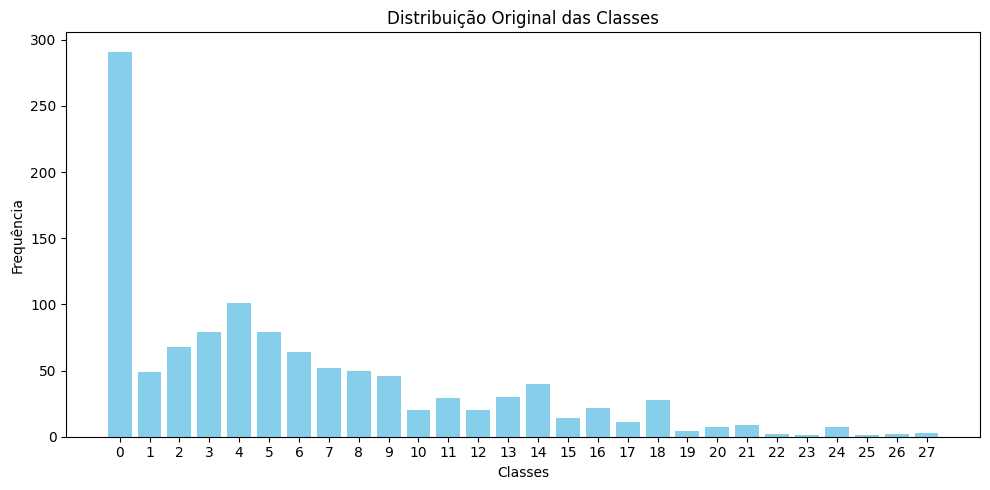

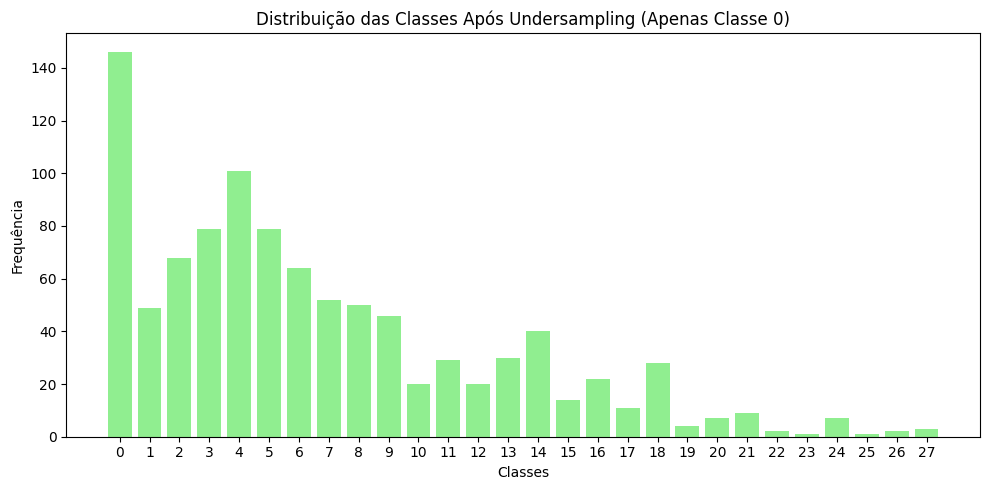

Acurácia do modelo MLP para Ansiedade (escore_phq9) após balanceamento: 0.63


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from collections import Counter

df_train = pd.read_csv('/content/seguimento_tratado1.csv')

features = ['pqar_windows', 'pqar_quali', 'pqar_temp', 'pqar_tempagrado',
            'pqar_umid', 'pqar_arcond', 'pqar_mask', 'pqar_labcoat',
            'pqar_sint1', 'pqar_sint2', 'pqar_sint3', 'pqar_sint4',
            'pqar_sint5', 'phq1', 'phq2', 'phq3', 'phq4',
            'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'phq_10', 'gad1',
            'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'escore_burnout']

X = df_train[features]
y = df_train['escore_phq9']

original_dist = Counter(y)

df_combined = pd.concat([X, y], axis=1)

min_class_size = df_combined['escore_phq9'].value_counts().min()
avg_class_size = (min_class_size + df_combined['escore_phq9'].value_counts()[0]) // 2


df_majority = df_combined[df_combined['escore_phq9'] == 0]
df_majority_undersampled = df_majority.sample(n=avg_class_size, random_state=1)


df_minority = df_combined[df_combined['escore_phq9'] != 0]


df_balanced = pd.concat([df_majority_undersampled, df_minority])

X_balanced = df_balanced[features]
y_balanced = df_balanced['escore_phq9']

balanced_dist = Counter(y_balanced)


plt.figure(figsize=(10, 5))
plt.bar(list(original_dist.keys()), original_dist.values(), color='skyblue')
plt.title('Distribuição Original das Classes')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(list(original_dist.keys()))
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(list(balanced_dist.keys()), balanced_dist.values(), color='lightgreen')
plt.title('Distribuição das Classes Após Undersampling (Apenas Classe 0)')
plt.xlabel('Classes')
plt.ylabel('Frequência')
plt.xticks(list(balanced_dist.keys()))  # Mostrar todas as classes corretamente
plt.tight_layout()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=1)
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo MLP para Ansiedade (escore_phq9) após balanceamento: {accuracy:.2f}')


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


df_train = pd.read_csv('/content/seguimento_tratado1.csv')


features = ['pqar_windows', 'pqar_quali', 'pqar_temp', 'pqar_tempagrado',
            'pqar_umid', 'pqar_arcond', 'pqar_mask', 'pqar_labcoat',
            'pqar_sint1', 'pqar_sint2', 'pqar_sint3', 'pqar_sint4',
            'pqar_sint5', 'phq1', 'phq2', 'phq3', 'phq4',
            'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'phq_10', 'gad1',
            'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'escore_burnout']

X = df_train[features]
y = df_train['escore_gad7']


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)


kfold = KFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation


scores_gad7 = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print(f'Validação cruzada (escore_gad7) - Acurácias: {scores_gad7}')
print(f'Média da acurácia para Ansiedade (escore_gad7): {np.mean(scores_gad7):.2f}')


y = df_train['escore_phq9']

scores_phq9 = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')

print(f'Validação cruzada (escore_phq9) - Acurácias: {scores_phq9}')
print(f'Média da acurácia para Depressão (escore_phq9): {np.mean(scores_phq9):.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Validação cruzada (escore_gad7) - Acurácias: [0.65486726 0.63716814 0.68141593 0.68584071 0.68444444]
Média da acurácia para Ansiedade (escore_gad7): 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Validação cruzada (escore_phq9) - Acurácias: [0.67699115 0.62831858 0.67699115 0.67256637 0.70222222]
Média da acurácia para Depressão (escore_phq9): 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do modelo MLP para Ansiedade (escore_gad7): 0.67


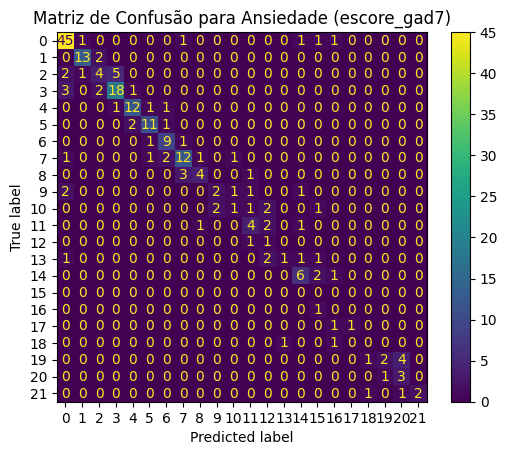

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


df_train = pd.read_csv('/content/seguimento_tratado1.csv')


features = ['pqar_windows', 'pqar_quali', 'pqar_temp', 'pqar_tempagrado',
            'pqar_umid', 'pqar_arcond', 'pqar_mask', 'pqar_labcoat',
            'pqar_sint1', 'pqar_sint2', 'pqar_sint3', 'pqar_sint4',
            'pqar_sint5', 'phq1', 'phq2', 'phq3', 'phq4',
            'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'phq_10', 'gad1',
            'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'escore_burnout']

X = df_train[features]
y = df_train['escore_gad7']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


smote = SMOTE( random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo MLP para Ansiedade (escore_gad7): {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Matriz de Confusão para Ansiedade (escore_gad7)')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


df_train = pd.read_csv('/content/seguimento_tratado1.csv')


features = ['pqar_windows', 'pqar_quali', 'pqar_temp', 'pqar_tempagrado',
            'pqar_umid', 'pqar_arcond', 'pqar_mask', 'pqar_labcoat',
            'pqar_sint1', 'pqar_sint2', 'pqar_sint3', 'pqar_sint4',
            'pqar_sint5', 'phq1', 'phq2', 'phq3', 'phq4',
            'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'phq_10', 'gad1',
            'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'escore_burnout']


X = df_train[features]
y = df_train['escore_gad7']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


print("Frequência de classes antes do SMOTE:")
print(y_train.value_counts())


smote = SMOTE(random_state=1)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


print("\nFrequência de classes após o SMOTE:")
print(y_resampled.value_counts())


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo MLP para Ansiedade (escore_gad7): {accuracy:.2f}')

Frequência de classes antes do SMOTE:
escore_gad7
0     211
7      75
3      71
5      65
2      56
6      51
1      51
4      47
14     46
8      32
13     27
16     21
15     20
9      20
21     19
12     19
11     16
18     13
10     12
17     11
20     11
19      9
Name: count, dtype: int64

Frequência de classes após o SMOTE:
escore_gad7
5     211
14    211
20    211
9     211
10    211
21    211
19    211
17    211
13    211
2     211
15    211
1     211
11    211
8     211
4     211
7     211
6     211
16    211
3     211
0     211
18    211
12    211
Name: count, dtype: int64
Acurácia do modelo MLP para Ansiedade (escore_gad7): 0.67


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler


df_train = pd.read_csv('/content/seguimento_tratado1.csv')


features = ['pqar_windows', 'pqar_quali', 'pqar_temp', 'pqar_tempagrado',
            'pqar_umid', 'pqar_arcond', 'pqar_mask', 'pqar_labcoat',
            'pqar_sint1', 'pqar_sint2', 'pqar_sint3', 'pqar_sint4',
            'pqar_sint5', 'phq1', 'phq2', 'phq3', 'phq4',
            'phq5', 'phq6', 'phq7', 'phq8', 'phq9', 'phq_10', 'gad1',
            'gad2', 'gad3', 'gad4', 'gad5', 'gad6', 'gad7', 'escore_burnout']


X = df_train[features]
y = df_train['escore_gad7']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rus = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=1)
model.fit(X_resampled, y_resampled)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo MLP após Under-Sampling (escore_gad7): {accuracy:.2f}')


y = df_train['escore_phq9']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


model.fit(X_resampled, y_resampled)

y_pred = model.predict(X_test)

# Calcular a acurácia
accuracy_depression = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo MLP após Under-Sampling (escore_phq9): {accuracy_depression:.2f}')


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Acurácia do modelo MLP após Under-Sampling (escore_gad7): 0.38
Acurácia do modelo MLP após Under-Sampling (escore_phq9): 0.12
